In [5]:

################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [6]:
new = pd.read_csv(r"C:\Users\suvar\Desktop\Linear Regression\baseball.csv") 
new.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
3,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [7]:
new.tail()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
258,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
259,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
260,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
261,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A
262,631,170,9,77,44,31,11,4908,1457,30,775,357,249,A,W,408,4,3,1000.0,A


In [8]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [9]:
new.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


<AxesSubplot:ylabel='HmRun'>

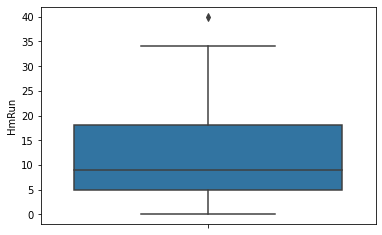

In [10]:
sns.boxplot(y='HmRun',data=new)

In [11]:
q1 = new['HmRun'].quantile(0.25)
q3 = new['HmRun'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

37.5

In [12]:
new['HmRun']=np.where(new['HmRun'] > upper_limit,upper_limit,new['HmRun']) 

<AxesSubplot:>

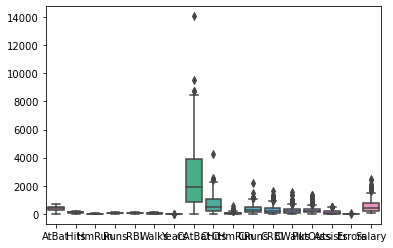

In [13]:
sns.boxplot(data=new)

In [14]:
new.describe() 

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.610266,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.727491,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,37.500000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


In [15]:
new.isna().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

# Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [16]:
new.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7.0,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
1,479,130,18.0,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
2,496,141,20.0,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
3,321,87,10.0,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
4,594,169,4.0,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [17]:
# Putting feature variable to X
X = new.drop('Salary', axis= 1)

# Putting response variable to y
y = new[['Salary']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [18]:
new = pd.concat([y_train, X_train], axis=1)
new.head()

,Salary,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
160,575.0,625,179,4.0,94,60,65,5,1696,476,12,216,163,166,A,E,303,450,14,A
93,400.0,340,84,11.0,62,33,47,5,1516,376,42,284,141,219,N,E,185,8,4,A
199,1670.0,608,160,28.0,130,74,89,8,4071,1182,103,862,417,708,A,E,426,4,6,A
227,105.0,453,103,8.0,53,33,52,2,507,123,8,63,39,58,A,W,289,407,6,A
224,475.0,530,159,3.0,82,50,47,6,1619,426,11,218,149,163,A,W,196,354,15,A


# Correlation Matrix

In [19]:
new.corr()

,Salary,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
Salary,1.000000,0.475099,0.518163,0.377224,0.513119,0.549247,0.493851,0.399747,0.506596,0.531595,0.472985,0.540551,0.543309,0.466775,0.363402,0.030072,-0.000590
AtBat,0.475099,1.000000,0.962257,0.532582,0.902918,0.776179,0.601185,0.014542,0.199520,0.214948,0.182627,0.227937,0.203550,0.129469,0.254576,0.381064,0.286701
Hits,0.518163,0.962257,1.000000,0.510207,0.911660,0.775596,0.567792,0.007734,0.190852,0.218037,0.152996,0.220200,0.194888,0.110103,0.265374,0.338722,0.248889
HmRun,0.377224,0.532582,0.510207,1.000000,0.617414,0.849199,0.384815,0.100304,0.192502,0.189367,0.474870,0.228215,0.334290,0.193195,0.211470,-0.152601,-0.068893
Runs,0.513119,0.902918,0.911660,0.617414,1.000000,0.779357,0.686856,-0.004189,0.174965,0.193249,0.218899,0.237138,0.206711,0.169670,0.280802,0.188621,0.137861
RBI,0.549247,0.776179,0.775596,0.849199,0.779357,1.000000,0.544375,0.132758,0.275678,0.285827,0.443562,0.302059,0.392738,0.235389,0.260840,0.069418,0.084651
Walks,0.493851,0.601185,0.567792,0.384815,0.686856,0.544375,1.000000,0.159429,0.278459,0.278999,0.319141,0.334656,0.312203,0.436304,0.259809,0.114265,0.005912
Years,0.399747,0.014542,0.007734,0.100304,-0.004189,0.132758,0.159429,1.000000,0.918531,0.898855,0.723738,0.880879,0.867929,0.855267,-0.037675,-0.025647,-0.115619
CAtBat,0.506596,0.199520,0.190852,0.192502,0.174965,0.275678,0.278459,0.918531,1.000000,0.994967,0.786416,0.982796,0.945235,0.915988,0.019619,0.026606,-0.063371
CHits,0.531595,0.214948,0.218037,0.189367,0.193249,0.285827,0.278999,0.898855,0.994967,1.000000,0.766679,0.985196,0.937876,0.903092,0.036841,0.018696,-0.063416


<AxesSubplot:>

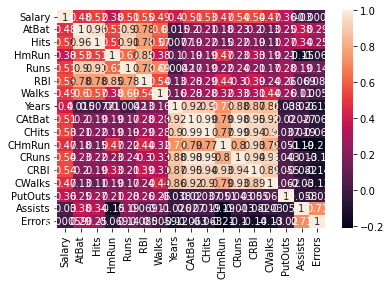

In [20]:
sns.heatmap(new.corr(),annot = True)

<AxesSubplot:title={'center':'AtBat vs Salary'}, xlabel='AtBat', ylabel='Salary'>

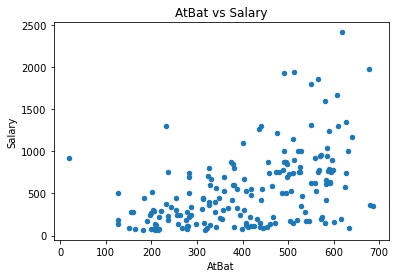

In [21]:
new.plot.scatter(x='AtBat', y='Salary', title='AtBat vs Salary')

* AtBat have no greter than 70% correlation with salary
* Hence, There is no Correlation.
* AtBat have no impact on Salary
* There is no Colinearity in data,So every Platform is independent.

### Multicolinearity (with the help of VIF)

In [22]:
X1=new.drop(['Salary'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Model Building

*  H0 :- There is no Linear relationship between Salary and AtBat 

          * Vs , radio & newspaper

*  H1 :- There is Linear relationship between sales and tv , radio & newspaper

Alpha = 0.05 (5%)

In [26]:
import statsmodels.formula.api as smf
model = smf.ols('Salary ~ AtBat+Hits+HmRun+Runs+RBI+Walks+Years+CAtBat+CHits+CHmRun+CRuns+CRBI+CWalks+League+Division+PutOuts+Assists+Errors+Salary+NewLeague',data=new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.067e+29
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:44:49   Log-Likelihood:                 4574.4
No. Observations:                 184   AIC:                            -9107.
Df Residuals:                     163   BIC:                            -9039.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       9.326e-13   1.54e-12      0.606      0.545   -2.11e-12    3.97e-12
League[T.N]     1.883e-13   1.38e-12      0.136      0.892   -2.54e-12    2.92e-12
Division[T.W]  -2.842e-14   6.64e-13     -0.043      0.966   -1.34e-12    1.28e-12
NewLeague[T.N] -1.492e-13   1.37e-12     -0.109      0.913   -2.85e-12    2.55e-12
AtBat          -4.441e-16   9.78e-15     -0.045      0.964   -1.98e-14    1.89e-14
Hits            4.441e-16   3.69e-14      0.012      0.990   -7.24e-14    7.33e-14
HmRun           3.997e-15   9.67e-14      0.041      0.967   -1.87e-13    1.95e-13
Runs            4.219e-15   4.76e-14      0.089      0.930   -8.98e-14    9.82e-14
RBI            -1.332e-15   4.32e-14     -0.031      0.975   -8.66e-14    8.39e-14
Walks           3.997e-15   2.94e-14      0.136      0.892    -5.4e-14     6.2e-14
Years          -2.842e-14   2.05e-13     -0.138      0.890   -4.34e-13    3.77e-13
CAtBat         -2.193e-15   2.14e-15     -1.024      0.307   -6.42e-15    2.03e-15
CHits           1.554e-15   1.02e-14      0.153      0.879   -1.85e-14    2.17e-14
CHmRun         -8.882e-16   2.51e-14     -0.035      0.972   -5.05e-14    4.87e-14
CRuns           8.882e-16   1.12e-14      0.079      0.937   -2.12e-14     2.3e-14
CRBI            9.992e-16   1.11e-14      0.090      0.928   -2.09e-14    2.29e-14
CWalks         -1.138e-15   5.07e-15     -0.225      0.823   -1.11e-14    8.87e-15
PutOuts         1.249e-15   1.36e-15      0.917      0.360   -1.44e-15    3.94e-15
Assists         1.055e-15   3.46e-15      0.305      0.761   -5.78e-15    7.89e-15
Errors         -4.441e-15   6.69e-14     -0.066      0.947   -1.37e-13    1.28e-13
Salary             1.0000   1.12e-15   8.94e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                       87.592   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.536
Skew:                           1.957   Prob(JB):                     4.50e-67
Kurtosis:                       7.953   Cond. No.                     2.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
model2=smf.ols('Salary ~ AtBat+Hits',data=new).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     34.49
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           2.04e-13
Time:                        22:00:13   Log-Likelihood:                -1352.1
No. Observations:                 184   AIC:                             2710.
Df Residuals:                     181   BIC:                             2720.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.1673     89.746      0.682      0.496    -115.915     238.249
AtBat         -0.9673      0.708     -1.366      0.174      -2.365       0.430
Hits           8.0217      2.264      3.544      0.001       3.555      12.488
==============================================================================
Omnibus:                       34.322   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.621
Skew:                           0.960   Prob(JB):                     3.07e-13
Kurtosis:                       4.957   Cond. No.                     1.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:title={'center':'HmRun vs Salary'}, xlabel='HmRun', ylabel='Salary'>

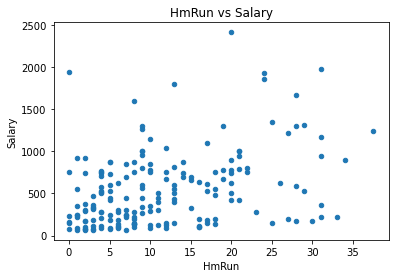

In [113]:
df.plot.scatter(x='HmRun', y='Salary', title='HmRun vs Salary')

<AxesSubplot:ylabel='Years'>

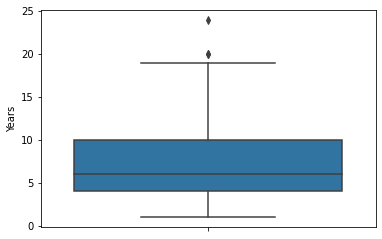

In [37]:
sns.boxplot(y='Years',data=new)

In [51]:
q1 = new['Years'].quantile(0.25)
q3 = new['Years'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

19.0

<AxesSubplot:ylabel='CAtBat'>

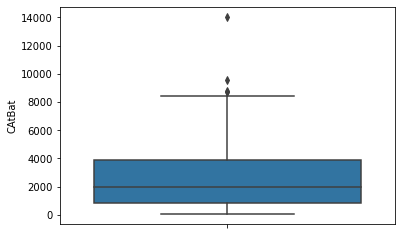

In [38]:
sns.boxplot(y='CAtBat',data=new)

In [52]:
q1 = new['CAtBat'].quantile(0.25)
q3 = new['CAtBat'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

8462.5

<AxesSubplot:ylabel='CHits'>

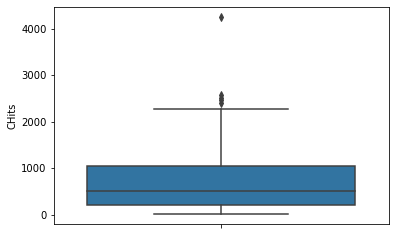

In [39]:
sns.boxplot(y='CHits',data=new)

In [53]:
q1 = new['CHits'].quantile(0.25)
q3 = new['CHits'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

2317.0

<AxesSubplot:ylabel='CHmRun'>

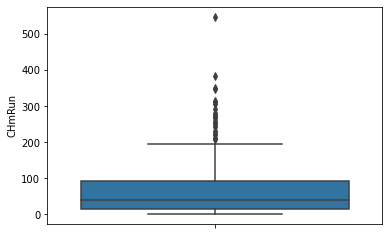

In [41]:
sns.boxplot(y='CHmRun',data=new)

In [54]:
q1 = new['CHmRun'].quantile(0.25)
q3 = new['CHmRun'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

208.75

<AxesSubplot:ylabel='CRuns'>

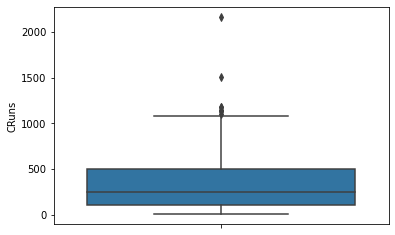

In [42]:
sns.boxplot(y='CRuns',data=new)

In [55]:
q1 = new['CRuns'].quantile(0.25)
q3 = new['CRuns'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

1085.5

<AxesSubplot:ylabel='CRBI'>

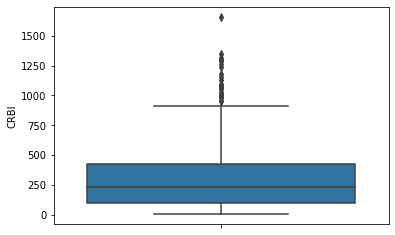

In [43]:
sns.boxplot(y='CRBI',data=new)

In [56]:
q1 = new['CRBI'].quantile(0.25)
q3 = new['CRBI'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

918.75

<AxesSubplot:ylabel='CWalks'>

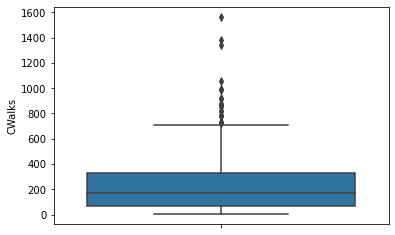

In [44]:
sns.boxplot(y='CWalks',data=new)

In [57]:
q1 = new['CWalks'].quantile(0.25)
q3 = new['CWalks'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

714.75

<AxesSubplot:ylabel='PutOuts'>

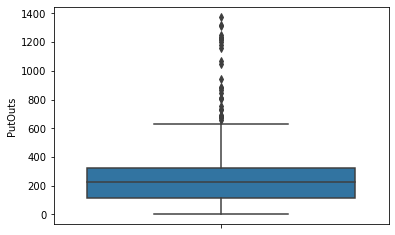

In [45]:
sns.boxplot(y='PutOuts',data=new)

In [58]:
q1 = new['PutOuts'].quantile(0.25)
q3 = new['PutOuts'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

636.0

<AxesSubplot:ylabel='Assists'>

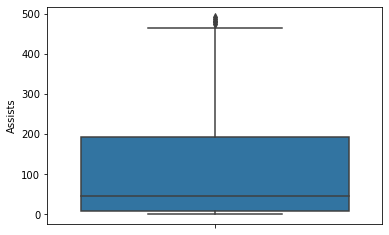

In [46]:
sns.boxplot(y='Assists',data=new)

In [59]:
q1 = new['Assists'].quantile(0.25)
q3 = new['Assists'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

468.0

<AxesSubplot:ylabel='Errors'>

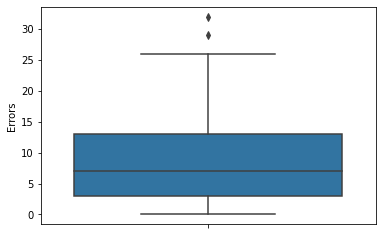

In [47]:
sns.boxplot(y='Errors',data=new)

In [60]:
q1 = new['Errors'].quantile(0.25)
q3 = new['Errors'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

28.0

<AxesSubplot:ylabel='Salary'>

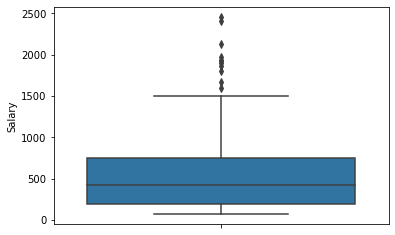

In [48]:
sns.boxplot(y='Salary',data=new)

In [61]:
q1 = new['Salary'].quantile(0.25)
q3 = new['Salary'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

1590.0